<a href="https://colab.research.google.com/github/Sebastianwhc/Vision-Artificial/blob/main/First_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data sources and routes

## Exploring the data

The dataset we will work with today will be one that contains images of dogs and cats.

In [1]:
# Código para importar archivos desde URL. OJO: Solo funciona en Colab.
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7a92075398d0>)

We unzip the set of images and save them in the temporary folder.

Doing it this way is useful because it does not permanently take up space in Drive.

Once the environment is disconnected or the tab is closed, the files are deleted.

In [2]:
import os
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
# Name path with all data.
base_dir='/tmp/cats_and_dogs_filtered'

# Direction of training and validation data.
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

# Directory with our training cat/dog pictures.
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

# Directory with our validation cat/dog pictures.
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [4]:
# Information display for training.
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.48.jpg', 'cat.713.jpg', 'cat.637.jpg', 'cat.87.jpg', 'cat.918.jpg', 'cat.140.jpg', 'cat.776.jpg', 'cat.37.jpg', 'cat.941.jpg', 'cat.180.jpg']
['dog.517.jpg', 'dog.985.jpg', 'dog.740.jpg', 'dog.246.jpg', 'dog.569.jpg', 'dog.585.jpg', 'dog.172.jpg', 'dog.12.jpg', 'dog.36.jpg', 'dog.349.jpg']


In [5]:
print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total training cat images:',len(os.listdir(train_dogs_dir)))

print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total validation cat images:',len(os.listdir(validation_dogs_dir)))


total training cat images: 1000
total training cat images: 1000
total validation cat images: 500
total validation cat images: 500


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

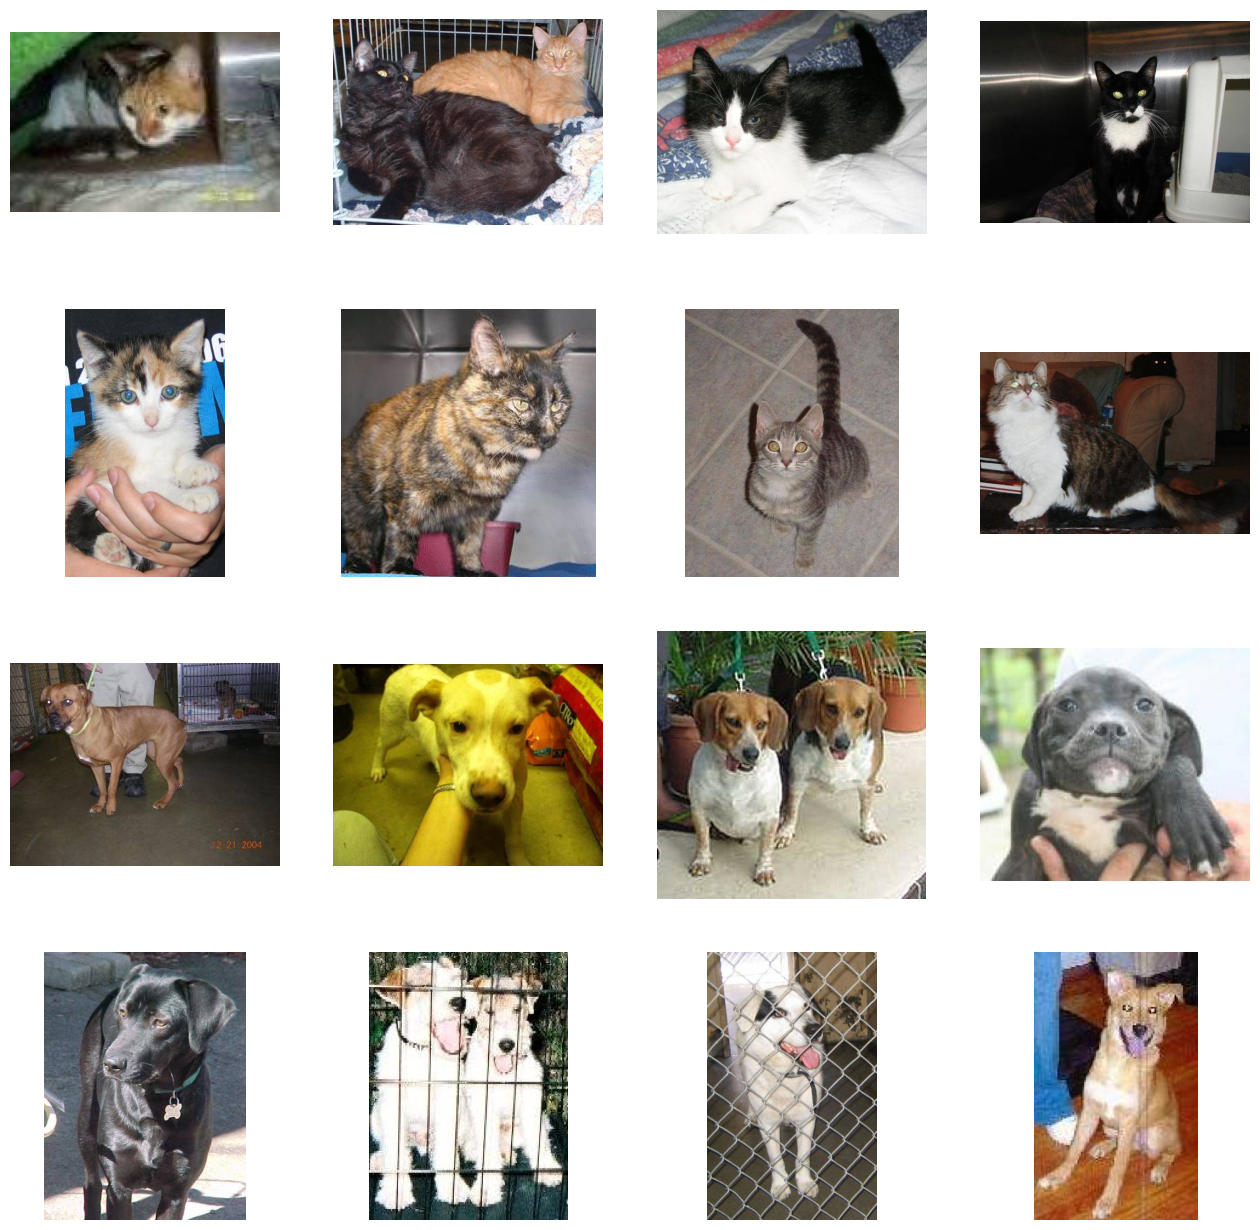

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Normalmente, después de una convolución se aplica una capa `MaxPooling`.

Después de las convoluciones siempre se coloca una capa `flatten`. Esta capa transforma la imagen de 2D en un vector para llevarlo a la capa Fully Connected (`Dense`).

`input_shape` siempre se coloca en la primera capa convolucional.

In [ ]:
# Código para importar archivos desde URL. OJO: Solo funciona en Colab.
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
urllib.request.urlretrieve(url, filename)

import os
import zipfile

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Name path with all data.
base_dir='/tmp/cats_and_dogs_filtered'

# Direction of training and validation data.
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

# Directory with our training cat/dog pictures.
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

# Directory with our validation cat/dog pictures.
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

# Information display for training.
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total training cat images:',len(os.listdir(train_dogs_dir)))

print('total validation cat images:',len(os.listdir(validation_cats_dir)))
print('total validation cat images:',len(os.listdir(validation_dogs_dir)))

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential([
    # Convolution Layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # Dense Layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from tensorflow.keras.optimizers import RMSprop
# Compilamos la red neuronal
# Tanto RMSprop como Adam o SGD tienen métricas.


Preprocesamiento de los datos

Este código se utiliza siempre que se trabaja con imágenes.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
# Aunque normalmente se utiliza el data argumentation.
train_datagen = ImageDataGenerator(rescale=1./255) # Creates a new ImageDataGenerator object and assigns it to the train_datagen variable.
test_datagen = ImageDataGenerator(rescale=1./255) # Creates a new ImageDataGenerator object and assigns it to the test_datagen variable.

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory( # Assigns the output of the flow_from_directory method to the train_generator variable.
        '/tmp/cats_and_dogs_filtered',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory( # Assigns the output of the flow_from_directory method to the validation_generator variable.
        '/tmp/cats_and_dogs_filtered',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


Entrenamiento

Ejecutando el modelo

Evaluando la precisión y la perdida del modelo

De las gráficas podemos ver que este modelo está en overfitting, cosa que era de esperarse.

Esto es debido a que, por ejemplo, en la primera gráfica, se puede ver que la precisión llega a alcanza el 100% y que la validación está muy separada de los valores de presición. Esto es señal de overfitting.

En la segunda gráfica se puede ver que la función de pérdida de validación aumenta de forma desproporcionada con respecto a los datos de la función de pérdida de entrenamiento que van disminuyendo. Eso es otra señal de overfitting.

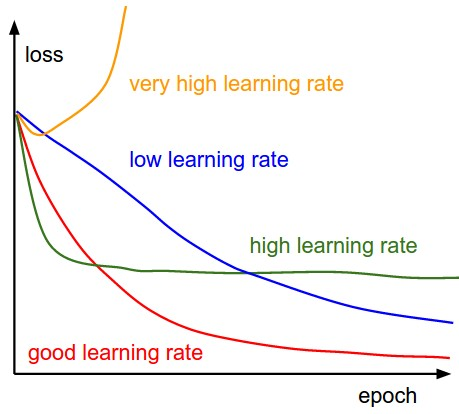

In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Download and extract the dataset if not already done
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
filename = '/tmp/cats_and_dogs_filtered.zip'
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Set up data directories
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Image preprocessing
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

# Save the model
model.save('cats_and_dogs_model.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.5202 - loss: 0.7951 - val_accuracy: 0.6330 - val_loss: 0.6408
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.5646 - loss: 0.6664 - val_accuracy: 0.5720 - val_loss: 0.6542
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5785 - loss: 0.6684 - val_accuracy: 0.6060 - val_loss: 0.6587
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5964 - loss: 0.6759 - val_accuracy: 0.6210 - val_loss: 0.6298
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.6161 - loss: 0.6372 - val_accuracy: 0.6750 - val_loss: 0.6016
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.6277 - loss: 0.6343 - val_accuracy: 0.6750 - val_loss: 0.5998
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.6726 - loss: 0.6083 - val_accuracy: 0.6500 - val_loss: 0.6208
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.6865 - loss: 0.5954 - val_accuracy: 0.6840 - val_loss: 0.

Test accuracy: 0.734000027179718


32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 638ms/step - accuracy: 0.7364 - loss: 0.5568


Test accuracy: 0.734000027179718


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted class: Dog


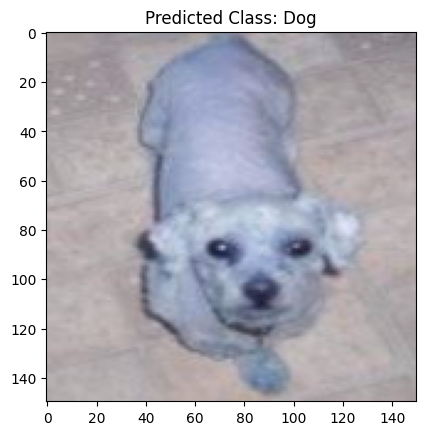

In [58]:
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)


# Save the model
model.save('cats_and_dogs_model.h5')

# Load the saved model
model = load_model('cats_and_dogs_model.h5')

# Prepare a test image
img_path = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2030.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Make a prediction
predictions = model.predict(img)

# Interpret the prediction
threshold = 0.5
if predictions[0] < threshold:
    print("Predicted class: Cat")
else:
    print("Predicted class: Dog")


plt.imshow(img[0]) # Access the first element of the array to get the image data
plt.title(f"Predicted Class: {'Dog' if predictions[0] > threshold else 'Cat'}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted class: Cat


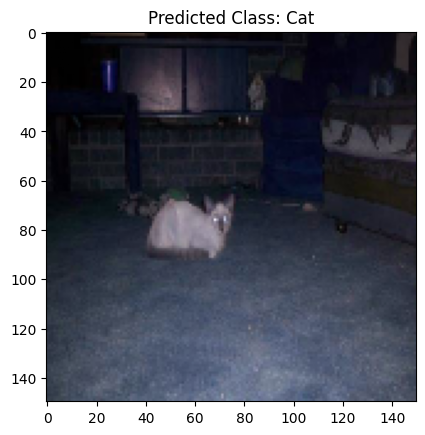

In [56]:
# Prepare a test image
img_path = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2040.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Make a prediction
predictions = model.predict(img)

# Interpret the prediction
threshold = 0.5
if predictions[0] > threshold:
    print("Predicted class: Cat")
else:
    print("Predicted class: Dog")


plt.imshow(img[0]) # Access the first element of the array to get the image data
plt.title(f"Predicted Class: {'Cat' if predictions[0] > threshold else 'Dog'}")
plt.show()